In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 활성화 함수

## (1) 계단함수

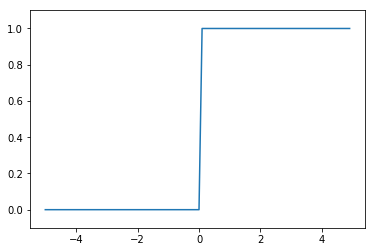

In [2]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()


## (2) 시그모이드 함수

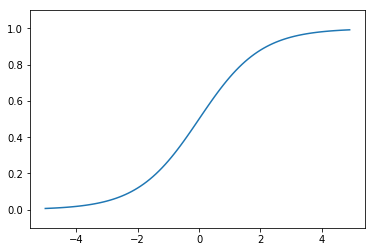

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()


## (3) ReLU

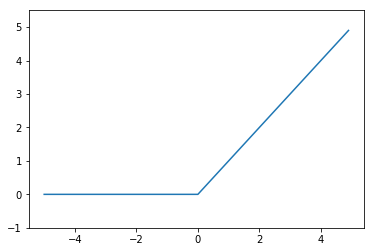

In [4]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

# 2. 행렬 곱

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])

In [6]:
A.shape, B.shape

((2, 3), (3, 2))

In [7]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

# 3. 3층 신경망 구현하기

## (1) 입력층에서 1층 전달

In [8]:
X = np.array([1, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2 ,0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

X.shape, W1.shape, B1.shape

((2,), (2, 3), (3,))

In [9]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

### 활성화 함수 통과 (sigmoid)

In [10]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

## (2) 1층에서 2층으로

In [11]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [12]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

## (3) 2층에서 출력층으로
- 출력층의 활성화 함수는 입력을 그대로 출력하는 항등함수로 표현함

In [13]:
def identity_function(x):
    return x

In [14]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [15]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [16]:
A3, Y

(array([0.31682708, 0.69627909]), array([0.31682708, 0.69627909]))

## (4) 전체 정리

In [17]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2 ,0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


def forward(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y


In [18]:
network = init_network()
x = np.array([1, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

## (5) 소프트맥스 함수

In [19]:
a = np.array([0.3, 2.9, 4])
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [20]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [21]:
y = exp_a/sum_exp_a
y, sum(y)

(array([0.01821127, 0.24519181, 0.73659691]), 1.0)

In [22]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

In [23]:
a = np.array([1000, 10000, 900])

In [24]:
softmax(a) # overflow 에러

/Users/sechang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/sechang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


array([nan, nan, nan])

In [25]:
def softmax(a):
    c = np.max(a) ## 오버플로 대책, 일반적으로 입력 신호 중 최댓값을 이용한다.
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

In [26]:
a = np.array([1000, 10000, 900])

In [27]:
softmax(a)

array([0., 1., 0.])

In [28]:
sum(softmax(a))

1.0

# 4. 손글씨 데이터 (mnist) 추론하기

In [44]:
# from google.colab import files

# files.upload()

In [29]:
from keras.datasets import mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

/Users/sechang/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
# (60000, 28, 28) - > x flatten - > (60000, 784)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]).astype('float')
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]).astype('float')

In [32]:
# x normalize (RGB = 255)

x_train /= 255.0
x_test /= 255.0

In [33]:
img = x_train[0]
label = t_train[0]
print(label)  # 5

5


In [34]:
print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

(784,)
(28, 28)


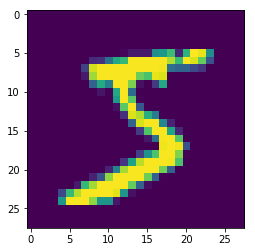

In [35]:
plt.imshow(img)

## (1) 데이터 처리

In [36]:
import pickle

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def get_data():
    # 추론을 위한 데이터만 return
    
    from keras.datasets import mnist
    (x_train, t_train), (x_test, t_test) = mnist.load_data()

    # x flatten

    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]).astype('float')
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]).astype('float')

    # x normalize

    x_train /= 255.0
    x_test /= 255.0
    
    return x_test, t_test


def init_network():
    # 미리 학습되어있는 weight를 이용하여 추론한다.
    
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

## (2) 추론 (predict)

In [37]:
def predict(network, x): 
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0

In [38]:
%%time
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
CPU times: user 1.91 s, sys: 63 ms, total: 1.98 s
Wall time: 4.04 s


In [39]:
np.argmax(predict(network, x[0]))

7

In [40]:
t[0]

7

## (3) 배치처리

In [41]:
x, t = get_data()
network = init_network()

In [42]:
%%time

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
CPU times: user 163 ms, sys: 13 ms, total: 176 ms
Wall time: 565 ms


### 10배 가량 빨라짐